<a href="https://colab.research.google.com/github/sanjaylila/machine-learning/blob/one/marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('student_info.csv')

In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.shape

(200, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


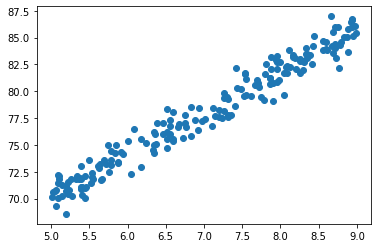

In [10]:
plt.scatter(x=df.study_hours,y=df.student_marks)

In [11]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [12]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df2=df.fillna(df.mean())

In [15]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [16]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [29]:
X=df2.drop('student_marks',axis=1)
y=df2.drop('study_hours',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [31]:
x_train.shape

(160, 1)

In [32]:
x_test.shape

(40, 1)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.coef_

array([[3.93571802]])

In [35]:
lr.intercept_

array([50.44735504])

In [36]:
y_pred=lr.predict(x_test)

In [37]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['study_hours','student_marks_original','student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [42]:
from sklearn.metrics import mean_squared_error
print('Accuracy of LR',mean_squared_error(y_pred,y_test))


Accuracy of LR 1.1080039417516452


In [43]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9542976475939564

In [44]:
import joblib
joblib.dump(lr,'students_marks_predictor.pkl')

['students_marks_predictor.pkl']

In [46]:
model=joblib.load('students_marks_predictor.pkl')

In [48]:
model.predict([[5]])

array([[70.12594512]])